In [1]:
import numpy as np
import abspy as ap
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
nsamp = 100
e_cl = np.zeros((nsamp,9,4,4))  # 9 angular bnads # 4 frequencies
b_cl = np.zeros((nsamp,9,4,4))  # 9 angular bnads # 4 frequencies
e_nl = np.zeros((nsamp,9,4,4))
b_nl = np.zeros((nsamp,9,4,4))
for i in range(nsamp):
    signal_path = './data/tcl/tcl_'+str(i)+'.npy'
    noise_path = './data/nl/nl_'+str(i)+'.npy'
    e_cl[i] = np.load(signal_path)[0]
    b_cl[i] = np.load(signal_path)[1]
    e_nl[i] = np.load(noise_path)[0]
    b_nl[i] = np.load(noise_path)[1]

In [3]:
freq_list = [30,95,150,353]
ell_list = [11.5,31.5,51.5,71.5,91.5,111.5,131.5,151.5,171.5]
nfreq = len(freq_list)
nell = len(ell_list)

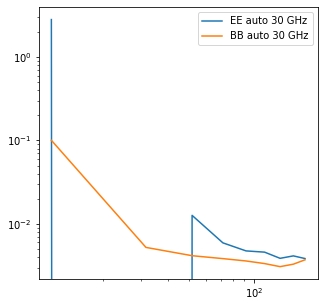

In [4]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(ell_list,e_cl[0,:,0,0],label='EE auto 30 GHz')
ax.plot(ell_list,b_cl[0,:,0,0],label='BB auto 30 GHz')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=1)

In [5]:
for i in range(nsamp):
    for j in range(nell):
        #print (0.5*ell_list[j]*(ell_list[j]+1)/np.pi)
        e_cl[i,j] *= 0.5*ell_list[j]*(ell_list[j]+1)/np.pi
        b_cl[i,j] *= 0.5*ell_list[j]*(ell_list[j]+1)/np.pi
        e_nl[i,j] *= 0.5*ell_list[j]*(ell_list[j]+1)/np.pi
        b_nl[i,j] *= 0.5*ell_list[j]*(ell_list[j]+1)/np.pi

In [6]:
e_nl_rms = np.zeros((nell,nfreq))
b_nl_rms = np.zeros((nell,nfreq))
for l in range(nell):
    for i in range(nfreq):
        e_nl_rms[l,i] = np.std(e_nl[:,l,i,i])
        b_nl_rms[l,i] = np.std(b_nl[:,l,i,i])

In [7]:
e_nl_mean = np.mean(e_nl,axis=0)
b_nl_mean = np.mean(b_nl,axis=0)

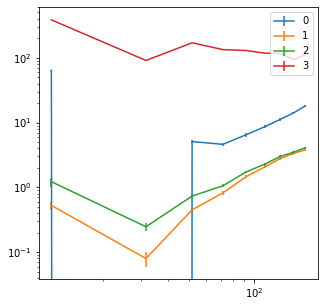

In [8]:
fig,ax = plt.subplots(figsize=(5,5))

for i in range(nfreq):
    ax.errorbar(ell_list,np.mean(e_cl[:,:,i,i],axis=0),yerr=np.std(e_cl[:,:,i,i],axis=0),label=str(i))
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=1)

In [9]:
rslt_e = list()
rslt_b = list()
for i in range(nsamp):
    separator = ap.abssep(e_cl[i],e_nl_mean,e_nl_rms,bins=9,modes=ell_list,shift=100.,threshold=1.0)
    rslt_e.append(separator())
    separator = ap.abssep(b_cl[i],b_nl_mean,b_nl_rms,bins=9,modes=ell_list,shift=100.,threshold=1.0)
    rslt_b.append(separator())

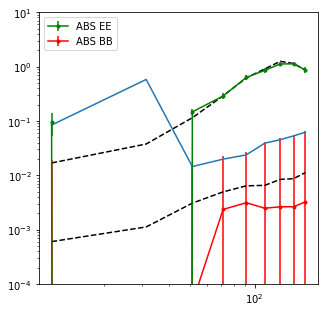

In [15]:
fig,ax = plt.subplots(figsize=(5,5))

cmb_e = [0.01685816,0.03757887,0.11436444,0.28912101,0.61793615,0.90602942,1.24804573,1.13694474,0.86632768]
cmb_b = [0.00060237,0.00112159,0.00307245,0.00495266,0.00638936,0.00652795,0.0084143,0.00865317,0.01117485]

e_cl_est = np.zeros((nsamp,9))
b_cl_est = np.zeros((nsamp,9))
for i in range(nsamp):
    e_cl_est[i] = rslt_e[i][1]
    b_cl_est[i] = rslt_b[i][1]

ax.plot(ell_list,cmb_e,'k--')
ax.plot(ell_list,cmb_b,'k--')
ax.errorbar(rslt_e[0][0],np.mean(e_cl_est,axis=0),yerr=np.std(e_cl_est,axis=0),
            color='green',marker='.',label=r'ABS EE')
ax.errorbar(rslt_b[0][0],np.mean(b_cl_est,axis=0),yerr=np.std(b_cl_est,axis=0),
            color='red',marker='.',label=r'ABS BB')
ax.plot(rslt_b[0][0],np.std(b_cl_est,axis=0))

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim((1.e-4,1.e+1))
ax.legend(loc=2)

In [16]:
print (np.std(b_cl_est,axis=0))

[0.08391944 0.57907356 0.01446524 0.01980549 0.02371875 0.0390088
 0.04519336 0.05306709 0.06187294]


In [17]:
print (np.mean(e_cl_est,axis=0))

[ 0.09662973 -0.17503028  0.1465261   0.2873289   0.62959299  0.8514862
  1.1184829   1.12129792  0.86898517]


In [18]:
print (np.mean(b_cl_est,axis=0))

[-6.49394170e-02 -2.29684018e+00  4.45945880e-05  2.35431336e-03
  3.12793705e-03  2.47571843e-03  2.63557203e-03  2.63579922e-03
  3.23242779e-03]
